In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


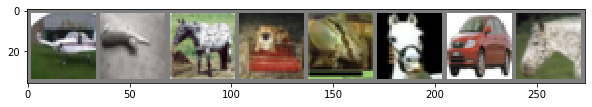

     plane      cat    horse      dog     frog    horse      car    horse


In [4]:
batch_size = 64
subset_size = 6400
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)

# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam', num_epochs=10, 
                log_every=4, plot=True, verbose=True)

In [6]:
solver.train()

Loading BokehJS ...

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    0,         4]    2.30748534 |        0.08203125
[    0,         8]    2.29606330 |        0.15234375
[    0,        12]    2.26905286 |        0.14843750
[    0,        16]    2.24989223 |        0.19531250
[    0,        20]    2.19347543 |        0.23828125
[    0,        24]    2.14750826 |        0.21484375
[    0,        28]    2.12825727 |        0.19921875
[    0,        32]    2.23781592 |        0.16796875
[    0,        36]    2.10661066 |        0.25000000
[    0,        40]    2.12337267 |        0.19140625
[    0,        44]    2.06945965 |        0.21484375
[    0,        48]    2.08674341 |        0.18359375
[    0,        52]    1.99875271 |        0.25000000
[    0,        56]    2.05202046 |        0.25781250
[    0,        60]    2.01807454 |        0.27343750
[    0,        64]    1.99844956 |        0.28125000
[    0,        68]    1.95762742 |        0.31

[    5,        36]    1.49239218 |        0.47265625
[    5,        40]    1.50136977 |        0.48437500
[    5,        44]    1.44554150 |        0.48046875
[    5,        48]    1.49808848 |        0.46093750
[    5,        52]    1.42170799 |        0.48828125
[    5,        56]    1.46454981 |        0.46484375
[    5,        60]    1.46737316 |        0.46484375
[    5,        64]    1.52075782 |        0.47265625
[    5,        68]    1.58302227 |        0.41015625
[    5,        72]    1.51377785 |        0.45703125
[    5,        76]    1.52796358 |        0.44140625
[    5,        80]    1.49666944 |        0.41015625
[    5,        84]    1.45323539 |        0.48437500
[    5,        88]    1.44791582 |        0.48437500
[    5,        92]    1.42312652 |        0.45703125
[    5,        96]    1.40722045 |        0.47265625
[    5,       100]    1.36873159 |        0.47265625
----------------------------------------------------
[    5,  finished]     accuracy: |        0.44

In [7]:
solver.print_bokeh_plots()

Loading BokehJS ...

Loading BokehJS ...

In [8]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

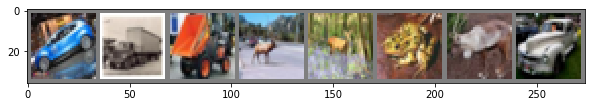

      Real:      car    truck    truck     deer     deer     frog     deer      car
 Predicted:      car    truck    truck    plane     deer     frog    horse      car


In [9]:
solver.predict_samples(classes)

In [10]:
solver.print_class_accuracies(classes)

Accuracy of plane : 46 %
Accuracy of   car : 72 %
Accuracy of  bird : 17 %
Accuracy of   cat : 12 %
Accuracy of  deer : 43 %
Accuracy of   dog : 58 %
Accuracy of  frog : 62 %
Accuracy of horse : 63 %
Accuracy of  ship : 70 %
Accuracy of truck : 45 %


In [11]:
solver.print_log()

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    0,         4]    2.30748534 |        0.08203125
[    0,         8]    2.29606330 |        0.15234375
[    0,        12]    2.26905286 |        0.14843750
[    0,        16]    2.24989223 |        0.19531250
[    0,        20]    2.19347543 |        0.23828125
[    0,        24]    2.14750826 |        0.21484375
[    0,        28]    2.12825727 |        0.19921875
[    0,        32]    2.23781592 |        0.16796875
[    0,        36]    2.10661066 |        0.25000000
[    0,        40]    2.12337267 |        0.19140625
[    0,        44]    2.06945965 |        0.21484375
[    0,        48]    2.08674341 |        0.18359375
[    0,        52]    1.99875271 |        0.25000000
[    0,        56]    2.05202046 |        0.25781250
[    0,        60]    2.01807454 |        0.27343750
[    0,        64]    1.99844956 |        0.28125000
[    0,        68]    1.95762742 |        0.31